In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
tweets=pd.read_csv('/home/german/notebooks/TP1-Cuarentena/train.csv')

In [4]:
tweets['exclamacion'] = tweets['text'].str.count("!")
tweets['hashtag'] = tweets['text'].str.count("#")
tweets['at'] = tweets['text'].str.count("@")

In [5]:
tweets.describe()

,id,target,exclamacion,hashtag,at
count,7613.000000,7613.00000,7613.000000,7613.000000,7613.000000
mean,5441.934848,0.42966,0.154079,0.446999,0.362406
std,3137.116090,0.49506,0.619387,1.099841,0.720097
min,1.000000,0.00000,0.000000,0.000000,0.000000
25%,2734.000000,0.00000,0.000000,0.000000,0.000000
50%,5408.000000,0.00000,0.000000,0.000000,0.000000
75%,8146.000000,1.00000,0.000000,0.000000,1.000000
max,10873.000000,1.00000,12.000000,13.000000,8.000000


In [30]:
#Por cada cantidad diferente de signos de exclamacion, voy a sumar los veraces y los totales
exclamacionGroup = tweets.groupby(['exclamacion']).agg({'target':['sum','count']}).reset_index()
exclamacionGroup.columns = ['exclamacion','cantidad de veraces','total']

In [31]:
exclamacionGroup['porcentaje de tweets veraces']=\
                    exclamacionGroup['cantidad de veraces']/exclamacionGroup['total']*100

In [37]:
#Los tweets que tienen mas de 4 signos de exclamacion son muy pocos, a esos no los tengo
#en cuenta para este analisis
exclamacionGroup = exclamacionGroup[exclamacionGroup["total"]>10]

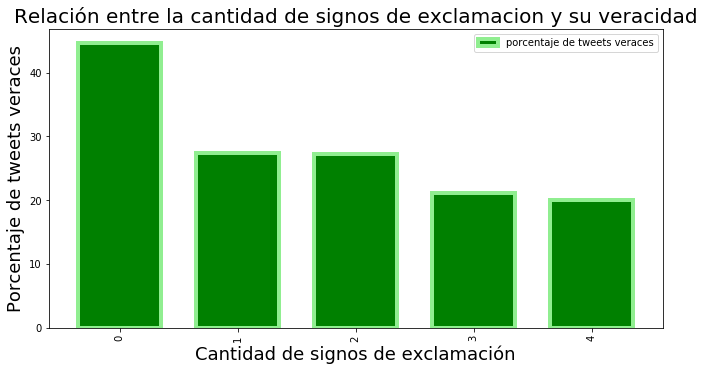

In [39]:
exclamacionGroup.plot(kind='bar', x='exclamacion', y='porcentaje de tweets veraces',\
                 width=0.7, figsize=(11,5.5), color='green',\
                 edgecolor="lightgreen", linewidth=4)
g=plt.gca()
g.set_title("Relación entre la cantidad de signos de exclamacion y su veracidad",\
            fontsize=20);
g.set_xlabel("Cantidad de signos de exclamación", fontsize=18);
g.set_ylabel("Porcentaje de tweets veraces", fontsize=18);

Los tweets que tienen signos de interrogacion suelen ser mas fake que los que no tienen. Y pareciera que mientras mas signos de exclamacion tiene, es mas probable que sean fake.

# Idem, pero ahora con hashtags

In [40]:
hashtagGroup = tweets.groupby(['hashtag']).agg({'target':['sum','count']}).reset_index()
hashtagGroup.columns = ['hashtag','cantidad de veraces','total']

In [41]:
hashtagGroup['porcentaje de tweets veraces']=\
                    hashtagGroup['cantidad de veraces']/hashtagGroup['total']*100

In [43]:
#Los tweets que tienen mas de 5 hashtag son muy pocos y no sirven para establecer un patron, a esos no los tengo
#en cuenta para este analisis
hashtagGroup = hashtagGroup[hashtagGroup["total"]>26]

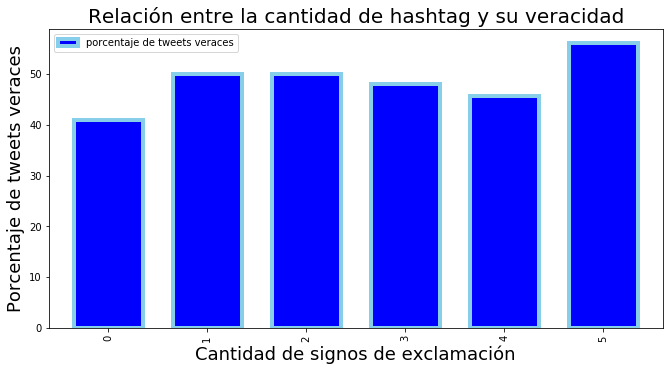

In [49]:
hashtagGroup.plot(kind='bar', x='hashtag', y='porcentaje de tweets veraces',\
                 width=0.7, figsize=(11,5.5), color='blue',\
                 edgecolor="skyblue", linewidth=4)
g=plt.gca()
g.set_title("Relación entre la cantidad de hashtag y su veracidad",\
            fontsize=20);
g.set_xlabel("Cantidad de signos de exclamación", fontsize=18);
g.set_ylabel("Porcentaje de tweets veraces", fontsize=18);

No parece haber un patrón claro sobre los tweets y su cantidad de hashtag.

# Idem, pero ahora con @

In [6]:
atGroup = tweets.groupby(['at']).agg({'target':['sum','count']}).reset_index()
atGroup.columns = ['at','cantidad de veraces','total']

In [7]:
atGroup['porcentaje de tweets veraces']=\
                    atGroup['cantidad de veraces']/atGroup['total']*100

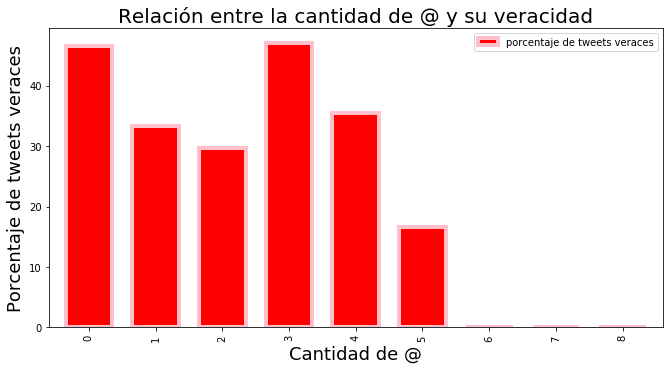

In [8]:
atGroup.plot(kind='bar', x='at', y='porcentaje de tweets veraces',\
                 width=0.7, figsize=(11,5.5), color='red',\
                 edgecolor="pink", linewidth=4)
g=plt.gca()
g.set_title("Relación entre la cantidad de @ y su veracidad",\
            fontsize=20);
g.set_xlabel("Cantidad de @", fontsize=18);
g.set_ylabel("Porcentaje de tweets veraces", fontsize=18);

No me arriesgaria a decir que existe un patron entre los tweets que citan a 0, 1, 2 o 3 usuarios, pero parece que desde 4 en adelante, esos tweets suelen ser fake.